### Obj: Implement KMeans from scratch using iris dataset

This notebook is a part of the series __From Scratch__, where i try to code machine learning algorithms from scratch (just numpy and math)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans  # Just for crosschecking

#### The iris dataset and preprocessing

I will only be using petal length and petal width features

In [4]:
iris_master = datasets.load_iris() 

In [5]:
iris = pd.DataFrame(
    data= np.hstack((iris_master['data'], iris_master['target'].reshape(-1, 1))),
    columns= iris_master['feature_names'] + ['target']
    )
iris["species"] = iris["target"].replace({0:"setosa", 1:"versicolor", 2:"virginica"})
iris = iris[["petal length (cm)", "petal width (cm)", "species"]]
iris

,petal length (cm),petal width (cm),species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


### Plottting the dataset

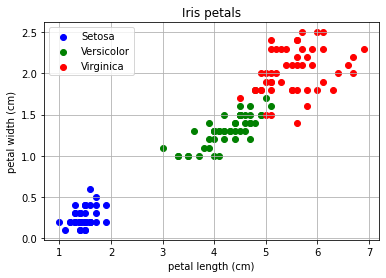

In [64]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=="versicolor"]
virginica = iris[iris.species=="virginica"]

fig, ax = plt.subplots()

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()
plt.show()

#### Converting to numpy

In [7]:
X = iris.to_numpy()[:, (0,1)].astype("float32")

### The KMeans Class from scratch

In [8]:
class KMeans_():
    
    def __init__(self, n_cluster, iterations, n_init):
        self.n_cluster = n_cluster
        self.iterations = iterations
        self.n_init = n_init  # Number of models to choose the best from
        
    
    def one_init_kmeans(self, X, n_cluster, iterations):
        # K-means for one random initialization
        
        m, n = X.shape
        init_index = np.random.randint(0, m, size=(n_cluster))
        centroids = X[init_index, :]
        costs = []

        for i in range(iterations):
            distances = np.zeros((m, n_cluster))
            
            for j in range(n_cluster):
                distances[:,j] = np.linalg.norm((X-centroids[j]).astype("float32"), axis=1)
            cent_index = np.argmin(distances, axis=1)
            
            for k in np.unique(cent_index):
                centroids[k] = X[cent_index==k].mean(axis=0)
                
            cost = self.distortion_function(X, centroids, cent_index)    
            costs.append(cost)

        return centroids, cent_index, costs
    
    
    @staticmethod
    def assign_centroid(X, clusters, idx):
        # Assigning each example to its corresponding centroid
        
        m, n = X.shape
        each_centroid = np.zeros((m, n))
        for i in np.unique(idx):
            each_centroid[idx==i] = clusters[i]
        return each_centroid
    
    def distortion_function(self, X, clusters, idx):
        # Computing the cost function of the model
        
        each_centroid = self.assign_centroid(X, clusters, idx)
        result = np.linalg.norm(X - each_centroid).sum()
        return result
    
    def fit(self, X):
        counter = None
        for i in range(self.n_init):
            model = self.one_init_kmeans(X, self.n_cluster, self.iterations)
            cost_final = model[2][-1]
            if counter is None or cost_final < counter:  # Deciding between the best model
                counter = cost_final
                centroids = model[0]
                cent_index = model[1]
                costs = model[2]
        
        self.centroids = centroids
        self.cent_index = cent_index
        self.costs_final = costs
    
    def fit_transfrom(self, X):
        self.fit(X)
        result = assign_centroid(X, self.centroids, self.cent_index)
        return result
        

#### Evaluation

final_centroids: 
[[5.5958343  2.0375004 ]
 [4.269231   1.3423076 ]
 [1.462      0.24599996]]


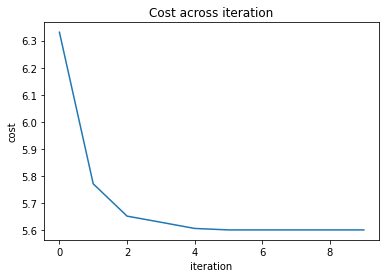

CPU times: total: 438 ms
Wall time: 1.06 s


In [9]:
%%time
model = KMeans_(3, 10, 5)
model.fit(X)
print("final_centroids: ")
print(model.centroids)

costs = model.costs_final

fig, ax = plt.subplots()

ax.plot(range(len(costs)), costs)
ax.set_xlabel("iteration")
ax.set_ylabel("cost")
ax.set_title("Cost across iteration")
plt.show()

Convergence is achieved =D

### Comparison with scikit learn kmeans

In [11]:
%%time
model_scikit = KMeans(3, n_init=5)
model_scikit.fit(X.astype("float32"))
model.centroids

CPU times: total: 31.2 ms
Wall time: 47.7 ms


array([[5.5958343 , 2.0375004 ],
       [4.269231  , 1.3423076 ],
       [1.462     , 0.24599996]], dtype=float32)

### Plotting the clusters

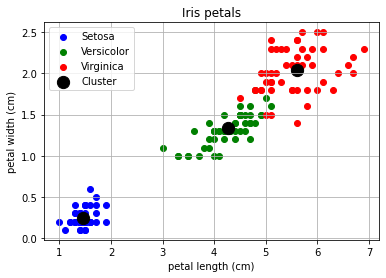

In [65]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

# The clusters
cluster_x = model.centroids[:,0]
cluster_y = model.centroids[:,1]

ax.scatter(cluster_x, cluster_y, color="black", label="Cluster", s=150)


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()
plt.show()

Not bad :p